## 0. Importing matplotlib

In [1]:
# Older versions of Jupyter Notebooks and matplotlib required this magic command 
# %matplotlib inline

# Import matplotlib and matplotlib.pyplot
import matplotlib
import matplotlib.pyplot as plt

print(f"matplotlib version: {matplotlib.__version__}")

matplotlib version: 3.10.8


## 1. two ways of creating plots

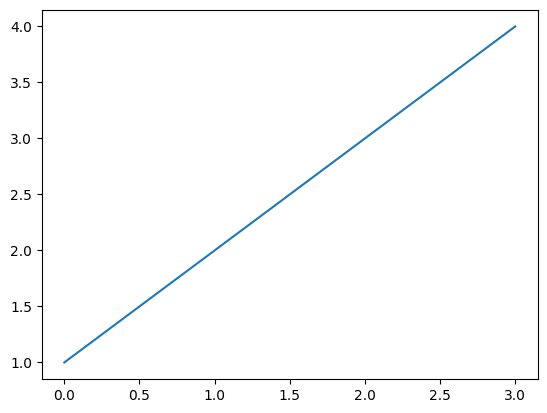

In [2]:
# Create a simple plot
# x is index
plt.plot([1, 2, 3, 4])
plt.show()

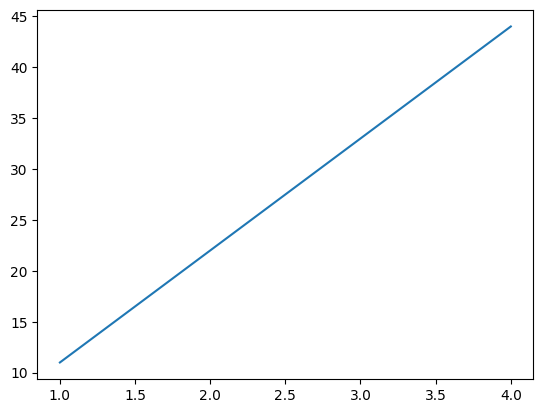

In [3]:
# Create some data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y);

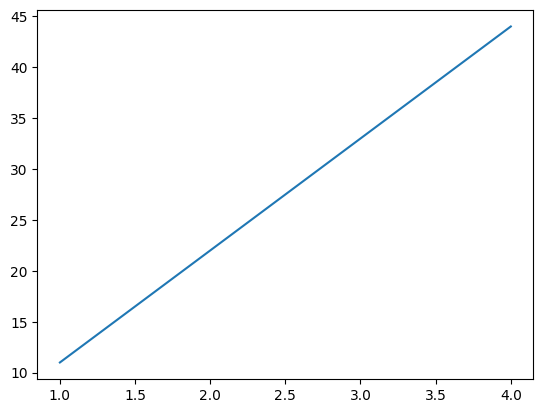

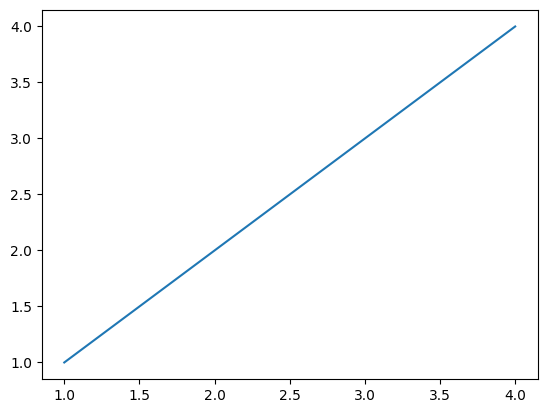

In [4]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.figure()
plt.plot(x, y)
y2=[1,2,3,4]
plt.figure()
plt.plot(x, y2)

plt.show()

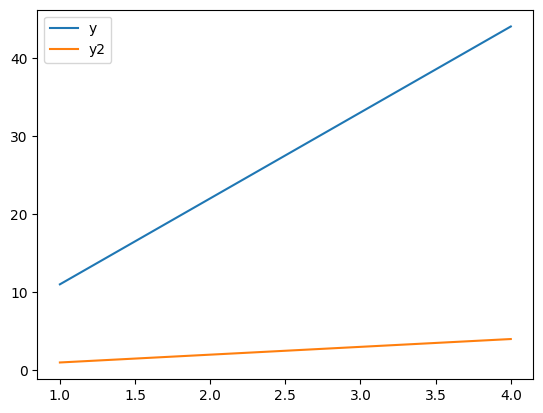

In [5]:
plt.figure()
plt.plot(x, y, label = "y")
plt.plot(x, y2, label = "y2")

plt.legend()
plt.show()

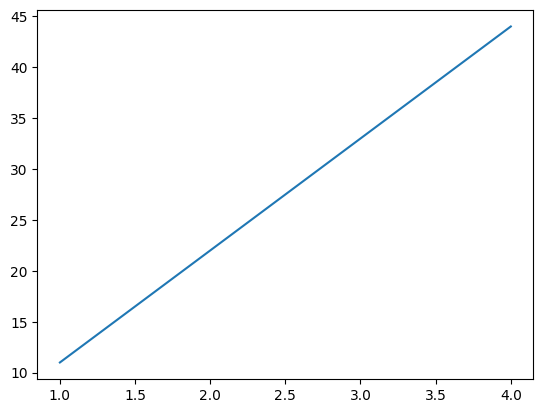

In [6]:
# Figure -> Axes -> plot
# Figure: Canvas
# Axes: drawing area
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

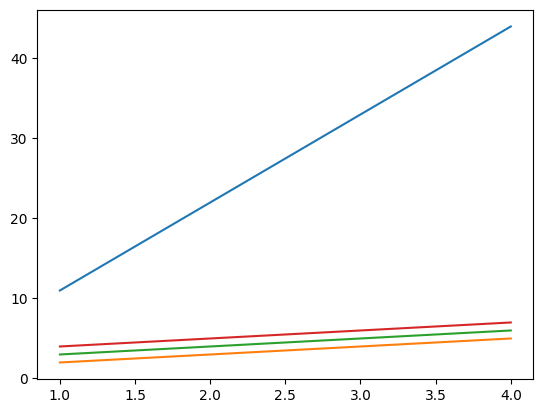

In [7]:
x = [1, 2, 3, 4]
y1=[1,2,3,4]
y2=[2,3,4,5]
y3=[3,4,5,6]
y4=[4,5,6,7]
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
plt.show()

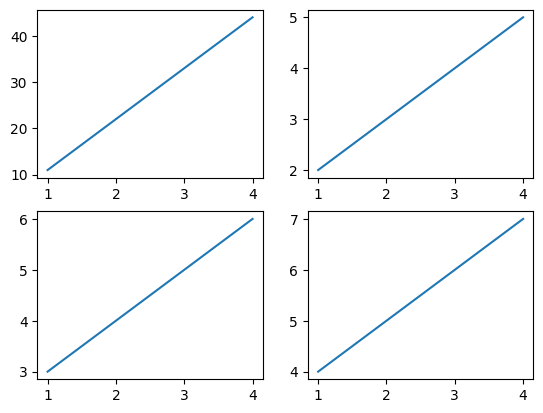

In [8]:
x = [1, 2, 3, 4]
y1=[1,2,3,4]
y2=[2,3,4,5]
y3=[3,4,5,6]
y4=[4,5,6,7]

fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(x, y)
ax[0, 1].plot(x, y2)
ax[1, 0].plot(x, y3)
ax[1, 1].plot(x, y4)

plt.show()

In [9]:
# This is where the object orientated name comes from 
type(fig), type(ax)

(matplotlib.figure.Figure, numpy.ndarray)

### A quick Matplotlib Workflow

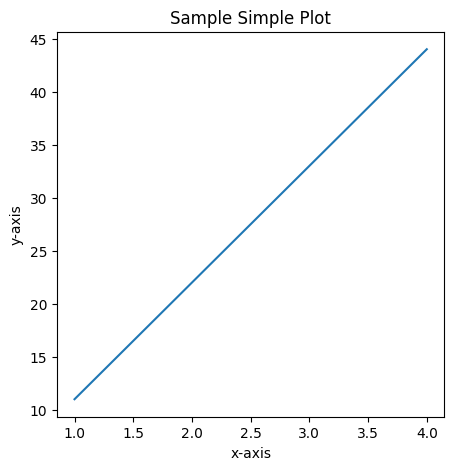

In [10]:
# A matplotlib workflow

# 0. Import and get matplotlib ready
# %matplotlib inline # Not necessary in newer versions of Jupyter (e.g. 2022 onwards)
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot (Figure and Axes)
fig, ax = plt.subplots(figsize=(5,5))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("./simple-plot.png")

## 2. Making the most common type of plots using NumPy arrays

In [11]:
import numpy as np

### Creating a line plot

In [12]:
# Create an array
# np.linspace: creates evenly spaced numbers
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

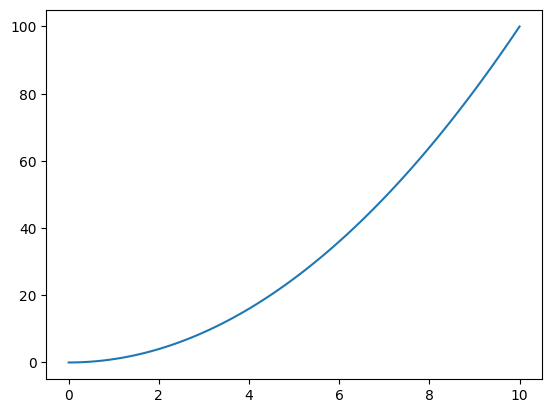

In [13]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);

### Creating a scatter plot

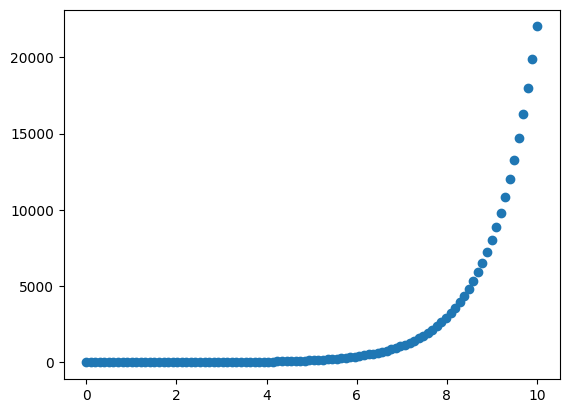

In [14]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

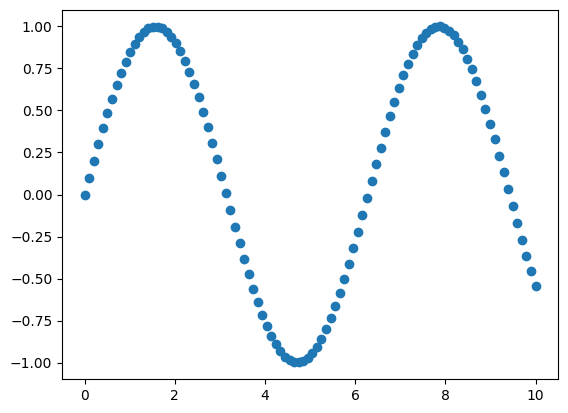

In [15]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

### Creating bar plots

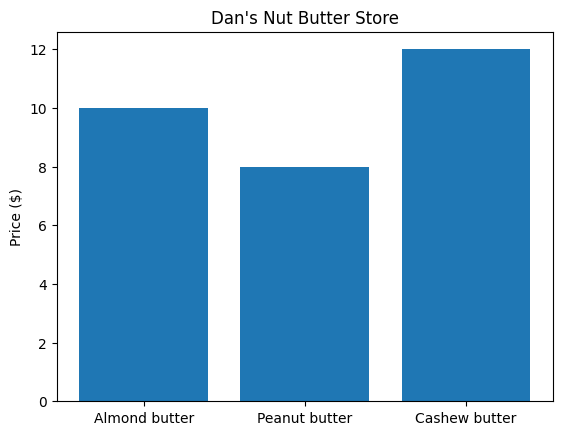

In [16]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

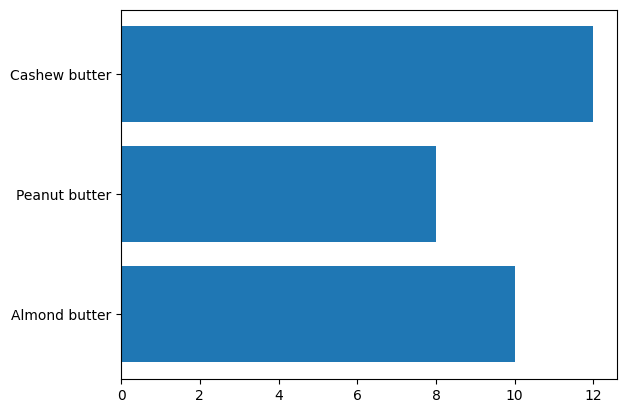

In [17]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

### Creating a histogram plot

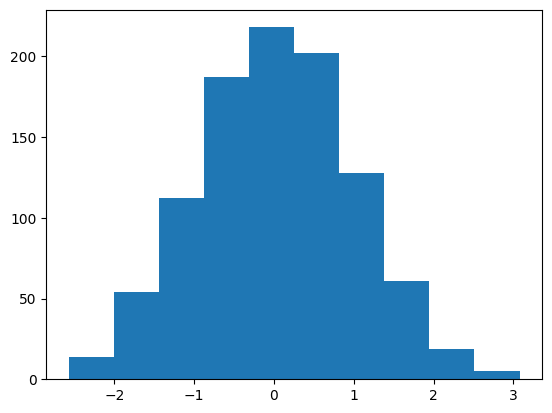

In [18]:
# Make some data from a normal distribution
x = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

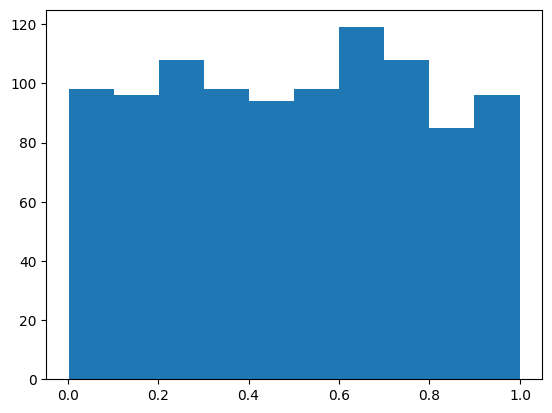

In [19]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);

### Creating Figures with multiple Axes with Subplots

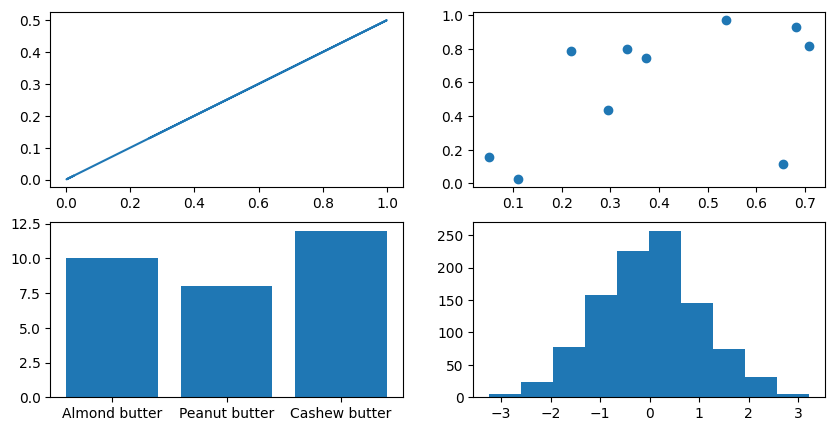

In [20]:
# Option 1: Create 4 subplots with each Axes having its own variable name
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

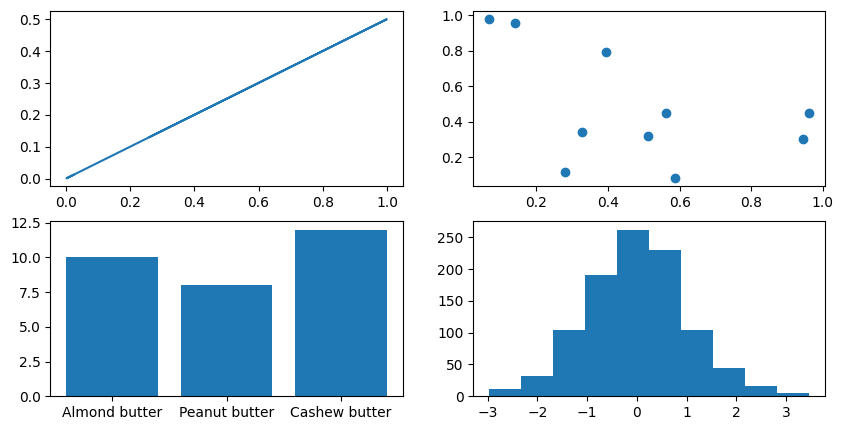

In [21]:
# Option 2: Create 4 subplots with a single ax variable
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index the ax variable to plot data
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## 3. Plotting data directly with pandas

In [22]:
import pandas as pd

In [23]:
# Let's import the car_sales dataset 
car_sales = pd.read_csv("./car-sales.csv") # load data from local file
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Line plot from a pandas DataFrame

In [24]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2025', periods=1000))

# Note: ts = short for time series (data over time)
ts

2025-01-01    1.320838
2025-01-02   -1.058854
2025-01-03    1.230605
2025-01-04    0.220601
2025-01-05   -1.466694
                ...   
2027-09-23    0.607670
2027-09-24   -0.499499
2027-09-25   -2.053769
2027-09-26   -1.234548
2027-09-27   -0.621269
Freq: D, Length: 1000, dtype: float64

In [25]:
# Add up the values cumulatively
ts.cumsum()

2025-01-01     1.320838
2025-01-02     0.261984
2025-01-03     1.492589
2025-01-04     1.713190
2025-01-05     0.246496
                ...    
2027-09-23    61.014393
2027-09-24    60.514895
2027-09-25    58.461126
2027-09-26    57.226578
2027-09-27    56.605308
Freq: D, Length: 1000, dtype: float64

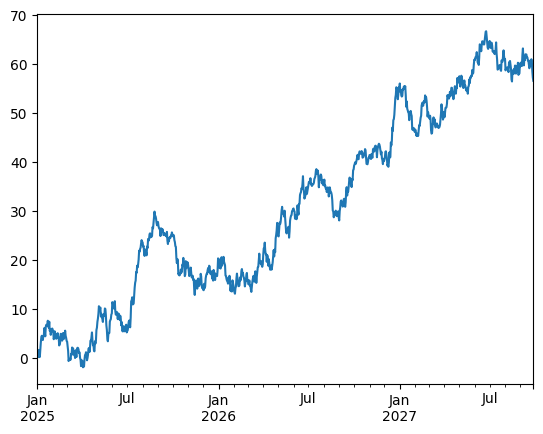

In [26]:
# Plot the values over time with a line plot (note: both of these will return the same thing)
# ts.cumsum().plot() # kind="line" is set by default
ts.cumsum().plot(kind="line");

### Working with actual data

In [27]:
# Import the car sales data 
car_sales = pd.read_csv("./car-sales.csv")

# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace("$", "", regex=False).str.replace(",", "", regex=False)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.00
1,Honda,Red,87899,4,5000.00
2,Toyota,Blue,32549,3,7000.00
3,BMW,Black,11179,5,22000.00
4,Nissan,White,213095,4,3500.00
5,Toyota,Green,99213,4,4500.00
6,Honda,Blue,45698,4,7500.00
7,Honda,Blue,54738,4,7000.00
8,Toyota,White,60000,4,6250.00
9,Nissan,White,31600,4,9700.00


In [28]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-4]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [29]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2024", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2024-01-01
1,Honda,Red,87899,4,5000,2024-01-02
2,Toyota,Blue,32549,3,7000,2024-01-03
3,BMW,Black,11179,5,22000,2024-01-04
4,Nissan,White,213095,4,3500,2024-01-05
5,Toyota,Green,99213,4,4500,2024-01-06
6,Honda,Blue,45698,4,7500,2024-01-07
7,Honda,Blue,54738,4,7000,2024-01-08
8,Toyota,White,60000,4,6250,2024-01-09
9,Nissan,White,31600,4,9700,2024-01-10


In [30]:
car_sales.dtypes

Make                        str
Colour                      str
Odometer (KM)             int64
Doors                     int64
Price                       str
Sale Date        datetime64[us]
dtype: object

In [31]:
# Make total sales column (doesn't work, adds as string)
#car_sales["Total Sales"] = car_sales["Price"].cumsum()

car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


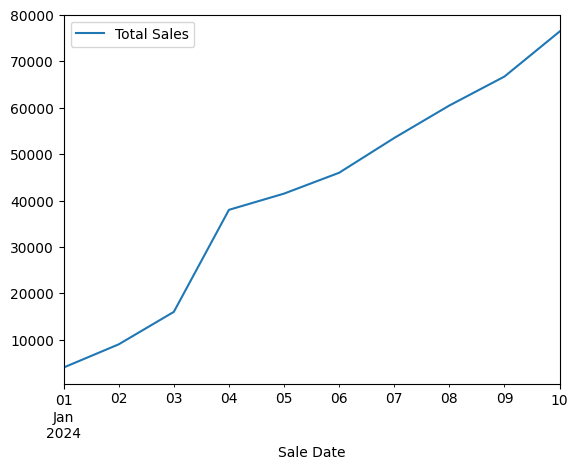

In [32]:
car_sales.plot(x='Sale Date', y='Total Sales');

### Scatter plot from a pandas DataFrame

In [33]:
car_sales.dtypes

Make                        str
Colour                      str
Odometer (KM)             int64
Doors                     int64
Price                       str
Sale Date        datetime64[us]
Total Sales               int64
dtype: object

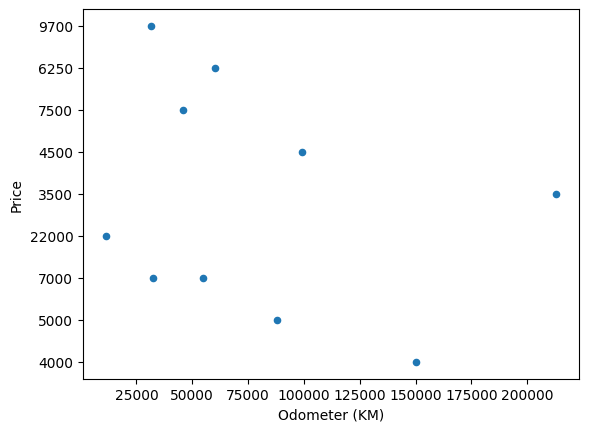

In [34]:
# Note: In previous versions of matplotlib and pandas, have the "Price" column as a string would
# return an error
# car_sales["Price"] = car_sales["Price"].astype(str)

# Plot a scatter plot
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

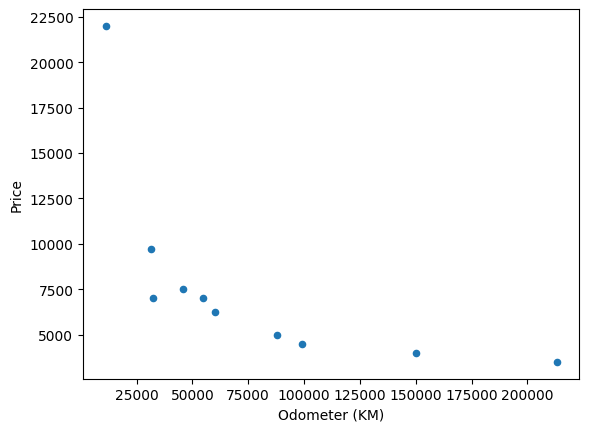

In [35]:
# Convert Price to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot a scatter plot
car_sales.plot(x="Odometer (KM)", y="Price", kind='scatter');

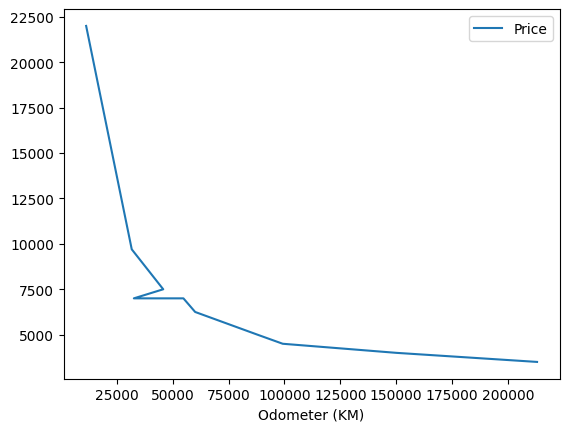

In [36]:
# plot a line
car_sales.sort_values(by="Price").plot(x="Odometer (KM)", y="Price");

### Bar plot from a pandas DataFrame

In [37]:
# Create 10 random samples across 4 columns
x = np.random.rand(10, 4)
x

array([[0.85255704, 0.60897261, 0.84886139, 0.81444408],
       [0.9187462 , 0.7641321 , 0.16373689, 0.81544129],
       [0.85995488, 0.70943568, 0.00556523, 0.12934134],
       [0.00126649, 0.49228545, 0.1543409 , 0.81518573],
       [0.77072521, 0.0420103 , 0.88518894, 0.39935054],
       [0.54866444, 0.24502293, 0.8805229 , 0.07129416],
       [0.01516612, 0.70815539, 0.88246781, 0.79241363],
       [0.72506221, 0.52824348, 0.70155175, 0.49396564],
       [0.18375861, 0.31140662, 0.7276592 , 0.04389442],
       [0.45148949, 0.39560104, 0.84775931, 0.99817999]])

In [38]:
# Turn the data into a DataFrame
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.852557,0.608973,0.848861,0.814444
1,0.918746,0.764132,0.163737,0.815441
2,0.859955,0.709436,0.005565,0.129341
3,0.001266,0.492285,0.154341,0.815186
4,0.770725,0.042010,0.885189,0.399351
5,0.548664,0.245023,0.880523,0.071294
6,0.015166,0.708155,0.882468,0.792414
7,0.725062,0.528243,0.701552,0.493966
8,0.183759,0.311407,0.727659,0.043894
9,0.451489,0.395601,0.847759,0.998180


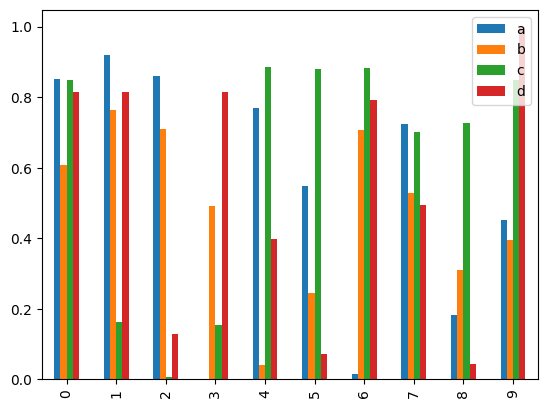

In [39]:
# Plot a bar chart
df.plot.bar();

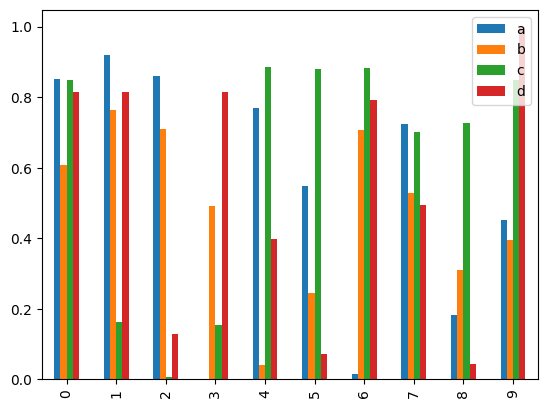

In [40]:
# Plot a bar chart with the kind parameter
df.plot(kind='bar');

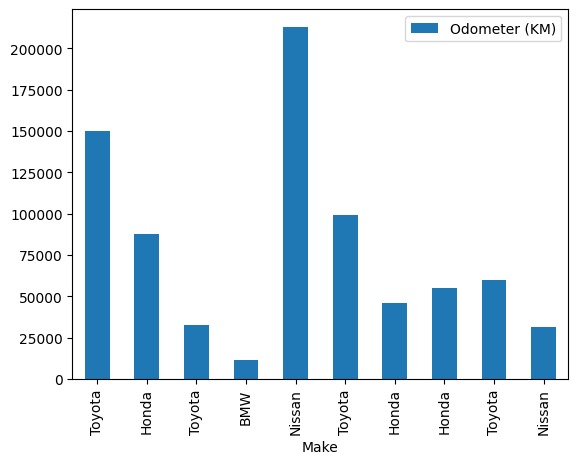

In [41]:
# Plot a bar chart from car_sales DataFrame
car_sales.plot(x="Make", 
               y="Odometer (KM)", 
               kind="bar");

### Histogram plot from a pandas DataFrame

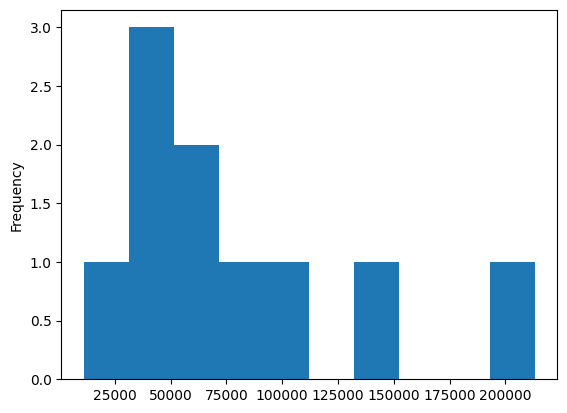

In [42]:
car_sales["Odometer (KM)"].plot.hist(bins=10); # default number of bins (or groups) is 10

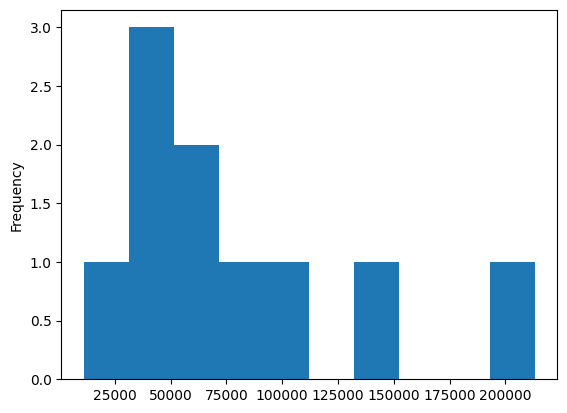

In [43]:
car_sales["Odometer (KM)"].plot(kind="hist");

In [44]:
# Import the heart disease dataset

heart_disease = pd.read_csv("./heart-disease.csv") 
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
heart_disease.info()

<class 'pandas.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


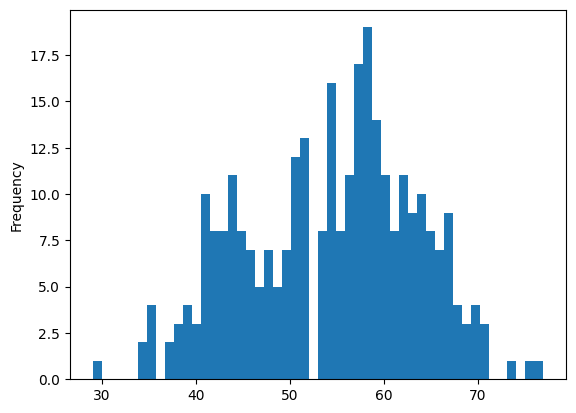

In [46]:
# Create a histogram of the age column
heart_disease["age"].plot.hist(bins=50);

### Creating a plot with multiple Axes from a pandas DataFrame

In [47]:
# Inspect the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 4. Plotting more advanced plots from a pandas DataFrame 

In [48]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


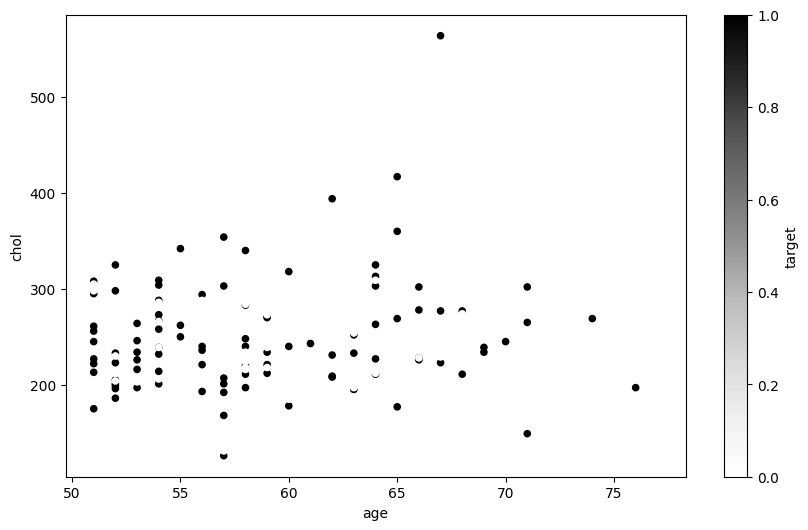

In [49]:
# Create a scatter plot directly from the pandas DataFrame
over_50.plot(kind="scatter",
             x="age", 
             y="chol", 
             c="target", # colour the dots by target value
             figsize=(10, 6));

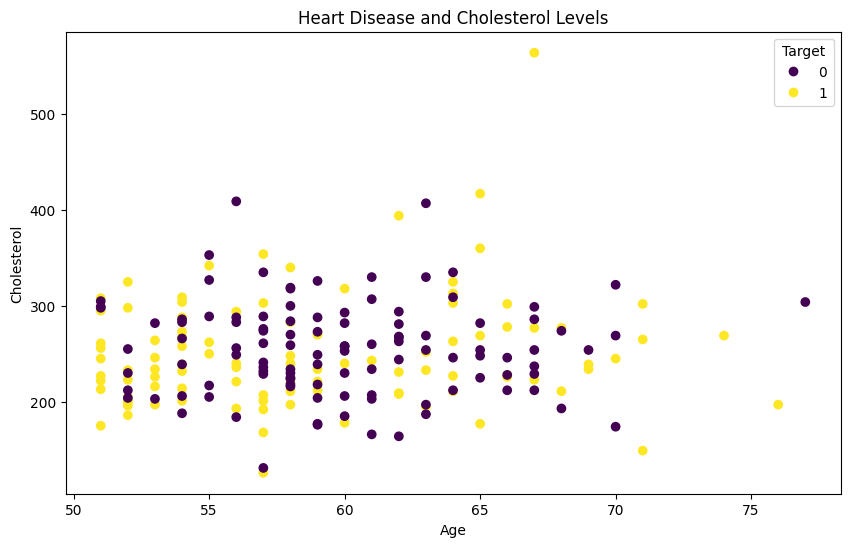

In [83]:
# Create Figure and Axes instance
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data directly to the Axes intance
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"]) # Colour the data with the "target" column

# Customize the plot parameters 
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Setup the legend
ax.legend(*scatter.legend_elements(), 
          title="Target");

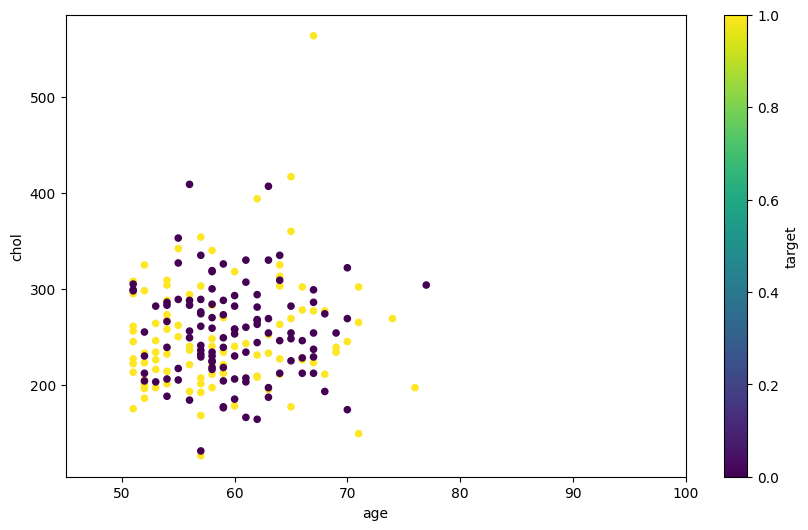

In [84]:
# Create a Figure and Axes instance
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data from the DataFrame to the ax object
over_50.plot(kind="scatter", 
             x="age", 
             y="chol", 
             c="target", 
             cmap="viridis",
             ax=ax); # set the target Axes

# Customize the x-axis limits (to be within our target age ranges)
ax.set_xlim([45, 100]);

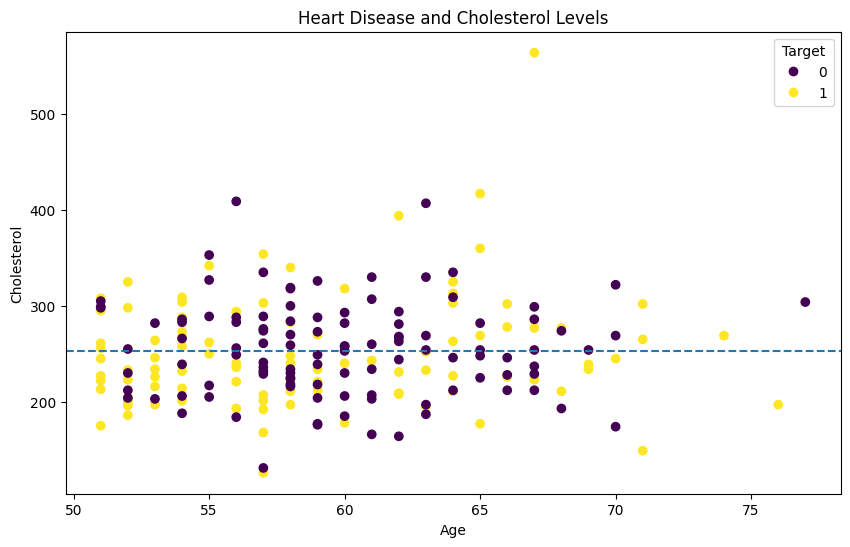

In [52]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legned
ax.legend(*scatter.legend_elements(), 
          title="Target")

# Add a meanline
ax.axhline(over_50["chol"].mean(),
           linestyle="--"); # style the line to make it look nice

### Plotting multiple plots on the same figure (adding another plot to an existing one)

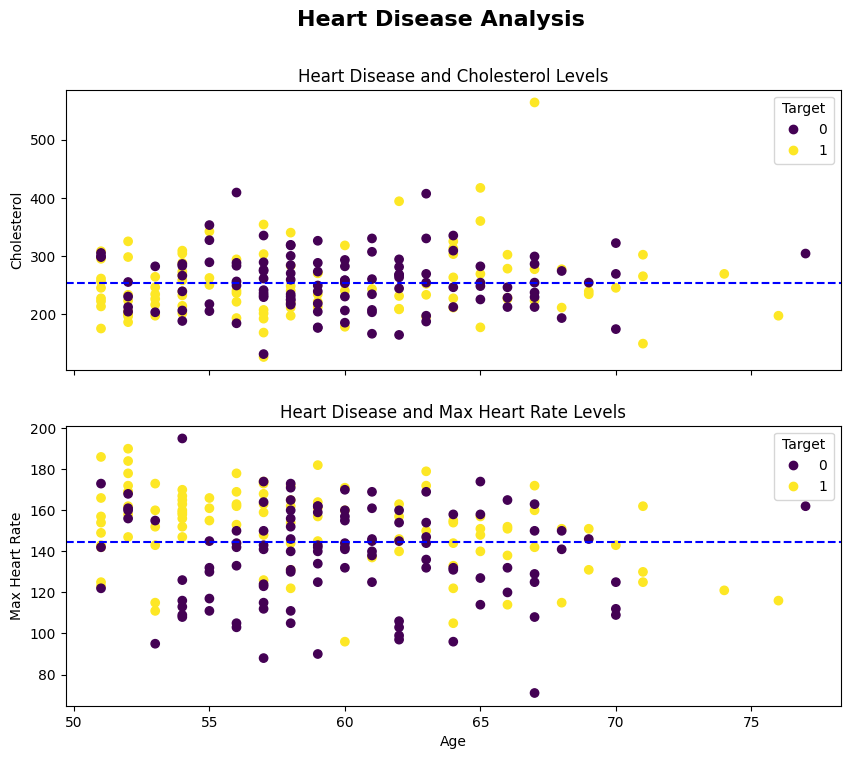

In [53]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, # 1 column 
                               sharex=True, # both plots should use the same x-axis 
                               figsize=(10, 8))

# ---------- Axis 0: Heart Disease and Cholesterol Levels ----------

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# ---------- Axis 1: Heart Disease and Max Heart Rate Levels ----------

# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', 
             fontsize=16, 
             fontweight='bold');

## 5. Customizing your plots (making them look pretty)

### Customizing the style of plots

In [54]:
# Check the available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

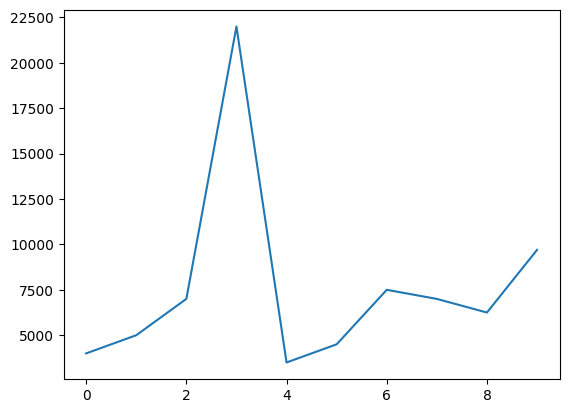

In [55]:
# Plot before changing style
car_sales["Price"].plot();

In [56]:
# Change the style of our future plots
plt.style.use("seaborn-v0_8-whitegrid")

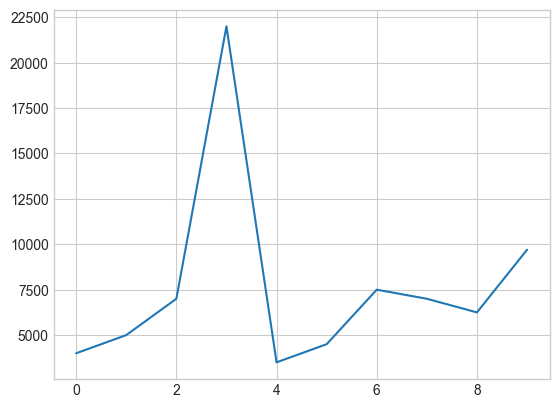

In [57]:
# Plot the same plot as before
car_sales["Price"].plot();

In [58]:
# Change the plot style
plt.style.use("fivethirtyeight")

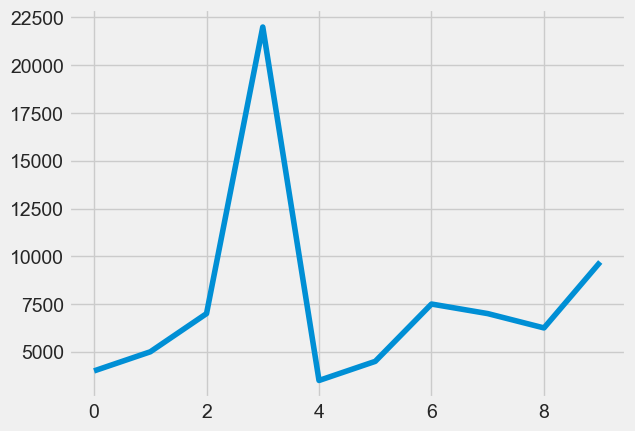

In [59]:
car_sales["Price"].plot();

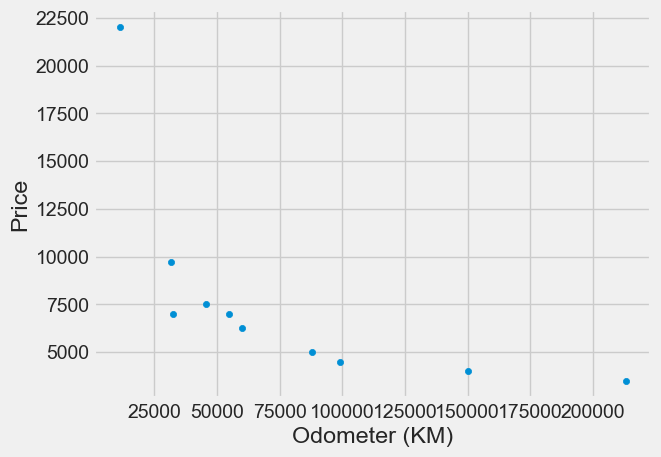

In [60]:
car_sales.plot(x="Odometer (KM)", 
               y="Price", 
               kind="scatter");

In [61]:
# Change the plot style
plt.style.use("ggplot")

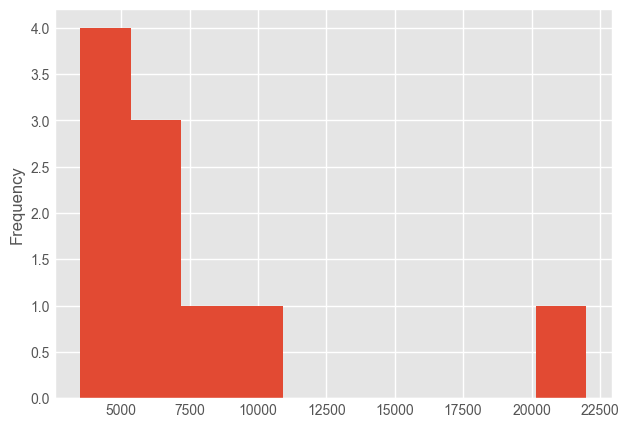

In [62]:
car_sales["Price"].plot.hist(bins=10);

In [63]:
# Change the plot style back to the default 
plt.style.use("default")

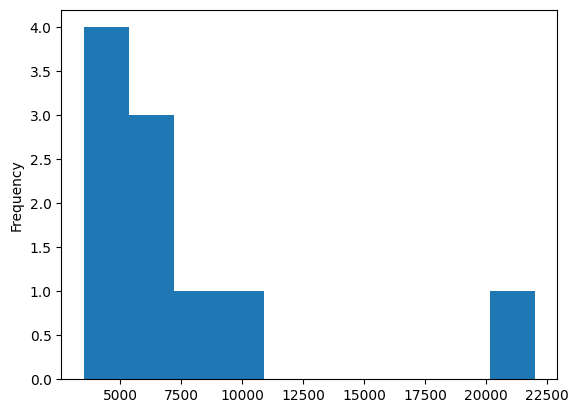

In [64]:
car_sales["Price"].plot.hist();

### Customizing the title, legend and axis labels

In [65]:
# Create random data
x = np.random.randn(10, 4)
x

array([[ 0.23024489,  1.20188753, -1.28445948,  0.1706781 ],
       [-0.34340938,  1.64800001, -1.06527734, -0.25512622],
       [ 2.09407225,  0.45681345, -0.03495767,  1.52395428],
       [ 0.00359664,  0.79691531,  0.34599102, -1.1509984 ],
       [-0.46497081,  2.68394077,  0.21637948,  0.16051972],
       [-2.6181233 , -1.06078285,  1.15331473, -1.18194839],
       [ 1.38214991, -1.26278096, -1.51286354, -0.36918732],
       [ 0.47366896, -0.37609538,  0.98102899, -1.65455441],
       [-1.60194702,  0.82458036,  1.47835426, -0.60719927],
       [-1.71948985,  1.15039179,  0.4925861 ,  0.80740368]])

In [66]:
# Turn data into DataFrame with simple column names
df = pd.DataFrame(x, 
                  columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.230245,1.201888,-1.284459,0.170678
1,-0.343409,1.648000,-1.065277,-0.255126
2,2.094072,0.456813,-0.034958,1.523954
3,0.003597,0.796915,0.345991,-1.150998
4,-0.464971,2.683941,0.216379,0.160520
5,-2.618123,-1.060783,1.153315,-1.181948
6,1.382150,-1.262781,-1.512864,-0.369187
7,0.473669,-0.376095,0.981029,-1.654554
8,-1.601947,0.824580,1.478354,-0.607199
9,-1.719490,1.150392,0.492586,0.807404


matplotlib.axes._axes.Axes

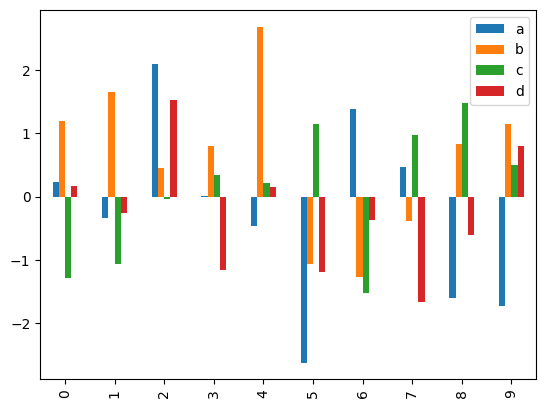

In [67]:
# Create a bar plot
ax = df.plot(kind="bar")

# Check the type of the ax variable
type(ax)

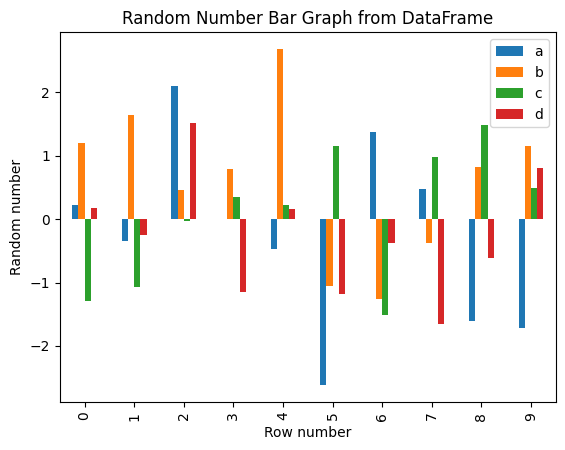

In [68]:
# Recreate the ax object
ax = df.plot(kind="bar")

# Set various attributes
ax.set(title="Random Number Bar Graph from DataFrame", 
       xlabel="Row number", 
       ylabel="Random number");

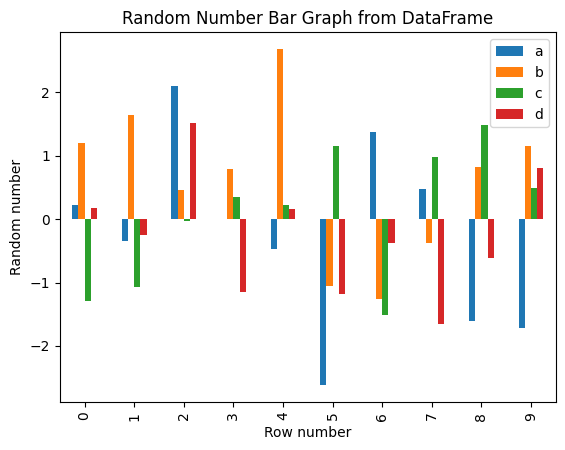

In [69]:
# Recreate the ax object
ax = df.plot(kind="bar")

# Set various attributes
ax.set(title="Random Number Bar Graph from DataFrame", 
       xlabel="Row number", 
       ylabel="Random number")

# Change the legend position
ax.legend(loc="upper right");

### Customizing the colours of plots with colormaps (cmap)

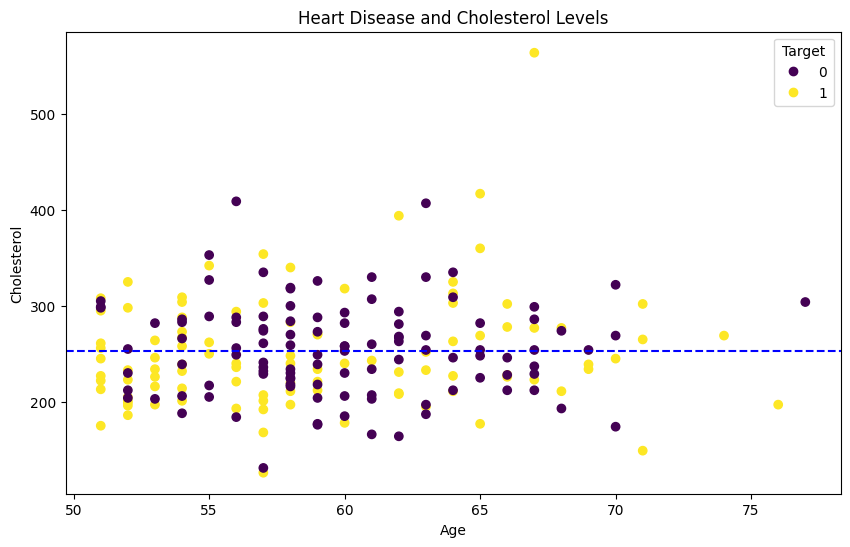

In [70]:
# Setup the Figure and Axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with no cmap change (use default colormap)
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"],
                     cmap="viridis") # default cmap value

# Add attributes to the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.axhline(y=over_50["chol"].mean(), 
           c='b', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), 
          title="Target");

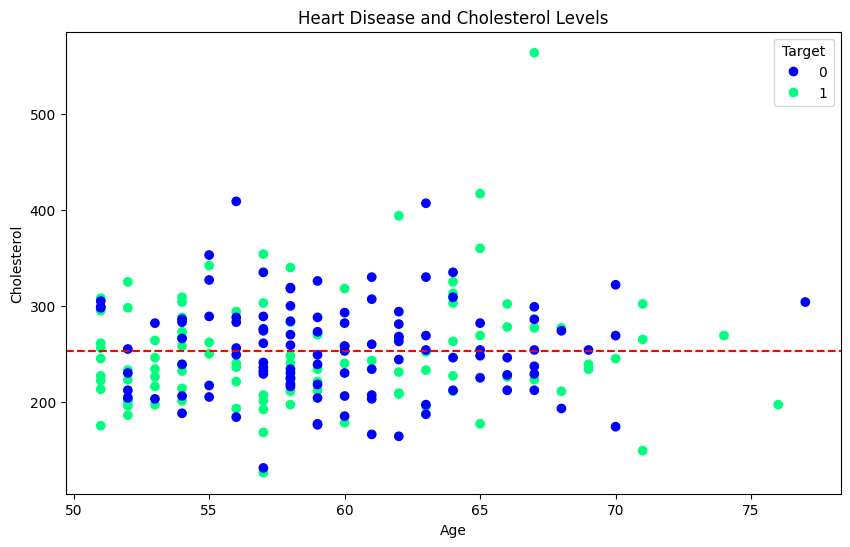

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

# Setup scatter plot with different cmap
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"], 
                     cmap="winter") # Change cmap value 

# Add attributes to the plot with different color line
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
ax.axhline(y=over_50["chol"].mean(), 
           color="r", # Change color of line to "r" (for red)
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), 
          title="Target");

### Customizing the xlim & ylim

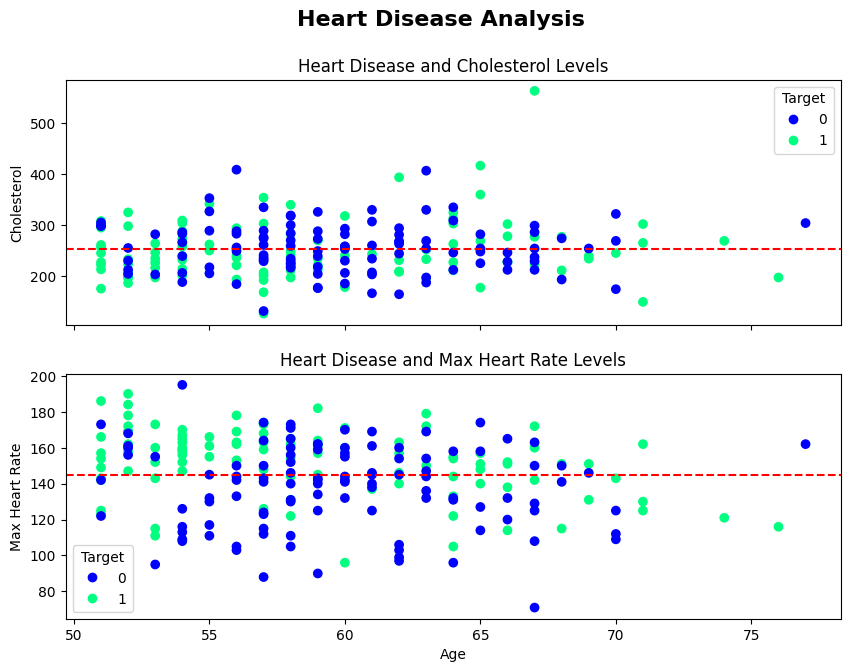

In [72]:
# Recreate double Axes plot from above with colour updates 
fig, (ax0, ax1) = plt.subplots(nrows=2, 
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 7))

# ---------- Axis 0 ----------
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap="winter")
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color="r", 
            linestyle="--", 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# ---------- Axis 1 ----------
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap="winter")
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color="r", 
            linestyle="--", 
            label="Average");
ax1.legend(*scatter.legend_elements(), 
           title="Target")

# Title the figure
fig.suptitle("Heart Disease Analysis", 
             fontsize=16, 
             fontweight="bold");

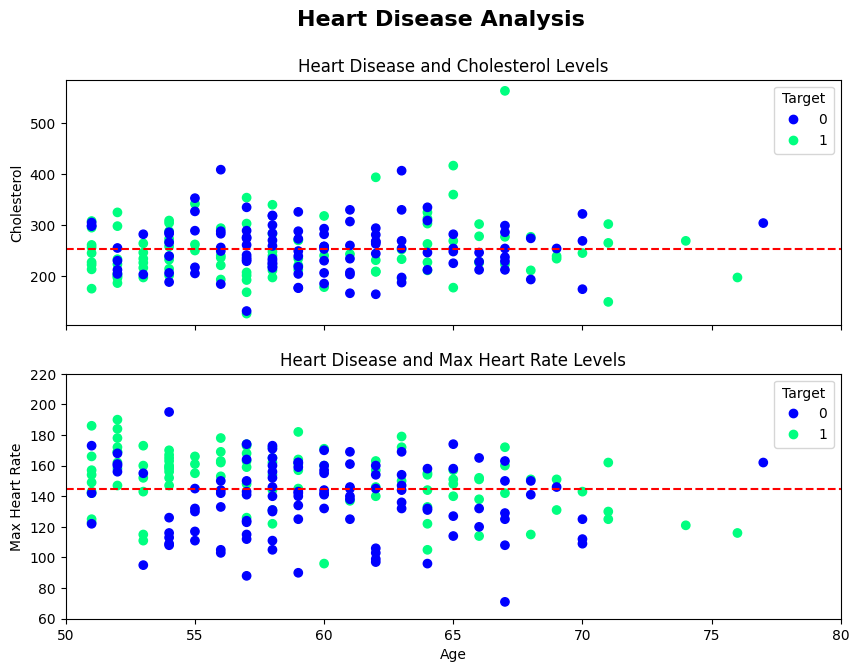

In [73]:
# Recreate the plot from above with custom x and y axis ranges
fig, (ax0, ax1) = plt.subplots(nrows=2, 
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 7))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol",
        xlim=[50, 80]) # set the x-axis ranges 

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color="r", 
            linestyle="--", 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate",
        ylim=[60, 220]) # change the y-axis range

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color="r", 
            linestyle="--", 
            label="Average");
ax1.legend(*scatter.legend_elements(), 
           title="Target")

# Title the figure
fig.suptitle("Heart Disease Analysis", 
             fontsize=16, 
             fontweight="bold");

## 6. Saving plots

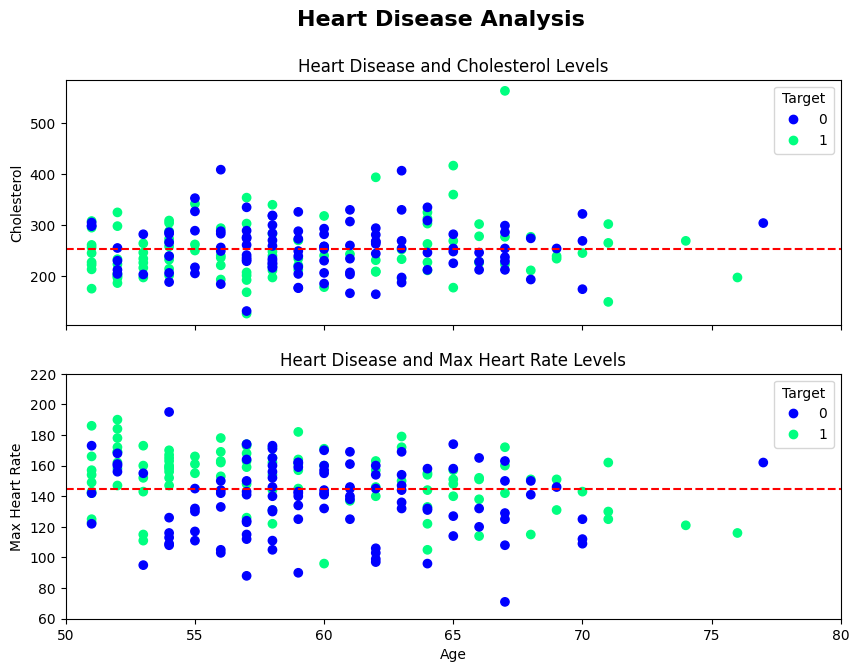

In [74]:
# Recreate the plot from above with custom x and y axis ranges
fig, (ax0, ax1) = plt.subplots(nrows=2, 
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 7))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol",
        xlim=[50, 80]) # set the x-axis ranges 

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color="r", 
            linestyle="--", 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate",
        ylim=[60, 220]) # change the y-axis range

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color="r", 
            linestyle="--", 
            label="Average");
ax1.legend(*scatter.legend_elements(), 
           title="Target")

# Title the figure
fig.suptitle("Heart Disease Analysis", 
             fontsize=16, 
             fontweight="bold");

In [75]:
# Check the supported filetypes
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

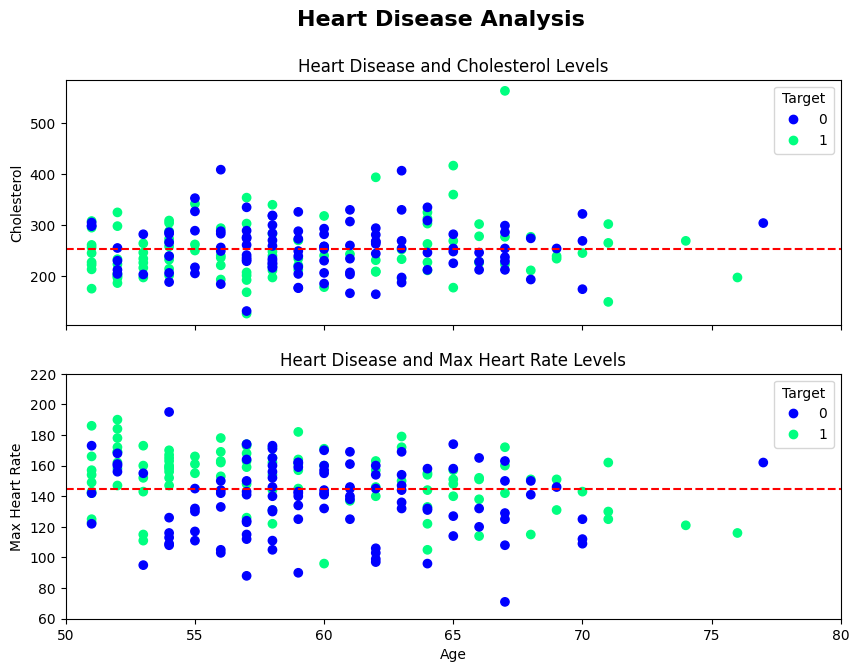

In [76]:
fig

In [77]:
# Save the file
fig.savefig(fname="./heart-disease-analysis.png",
            dpi=100)

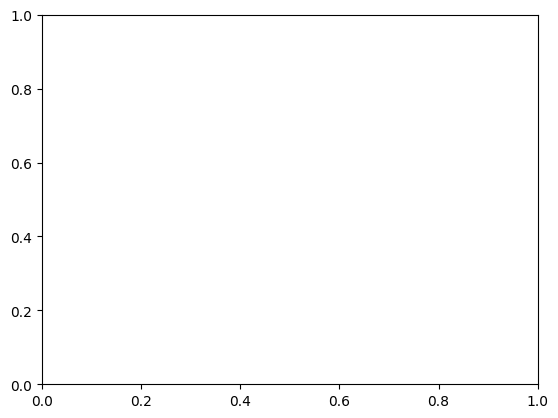

In [78]:
# Resets figure
fig, ax = plt.subplots()

In [79]:
# Potential matplotlib workflow function

def plotting_workflow(data):
    # 1. Manipulate data
    
    # 2. Create plot
    
    # 3. Plot data
    
    # 4. Customize plot
    
    # 5. Save plot
    
    # 6. Return plot
    
    return plot